In [1]:
# Stažení a instalace knihoven, které budeme používat

import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

Processing ./.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897/sklearn-0.0-py2.py3-none-any.whl


In [2]:

# Import knihoven, které budeme používat

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from scipy import stats
import random
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
# Regrese

#### Autoři:
* [Martin Vlach](mailto:xvlach@mendelu.cz)
* [Jakub Dolejší](mailto:xdolejsi@mendelu.cz)
---

### Regrese v různých vědních odvětvích
- **Lékařství** - *regrese nemoci*
- **Právo** - *regresy*
- **Filozofie** - *nekonečný regres*
- **Softwarové inženýrství** - *regresní testování*
- <span style="color:#eb4034">**Statistika** - *regresivní analýza*</span>

---
### Regresivní analýza
* Jedna z nejpoužívanějších statistických metod.
* Existuje značné množství variant, přičemž každá je vhodná na jiný typ problému.

</br>

* ***Definice*** - *Označení statistických metod, které souží k odhadu jisté náhodné veličiny na základě znalosti jedné či více jiných veličin. Cílem regresní analýzy je popsat tuto závislost pomocí vhodného modelu.*

    * ***Závislá proměnná*** - *Parametr, jehož hodnotu zkoumáme/hledáme.*
    * ***Nezávislá proměnná*** - *Parametr, jehož hodnota je nám známa. S využítím těchto hodnot je hledána hodnota závislé proměnné. Tyto hodnoty se často označují jako regresory*

#### Dělení regresivních modelů
* Diskrétní hodnoty proměnných **x** Spojité hodnoty proměnných **x** Kombinace
* Jednoduchá **x** Vícenásobná
* Lineární **x** Nelineární závislost
---

### Co to regrese vůbec je?
Regrese je obecně aparát sloužící k odhadu vztahu mezi závislou a nezávislou proměnnou.
Regresi si lze představit jak funkci, která má obecně N vstupů a jeden výstup. Každý jeden vstupní
parametr představuej nezávislou proměnnou, přičemž výstup je proměnná závislá na všech vstupech.


![image info](images/regression.jpg)


### Jaké jsou její typy

Jak již bylo zmíněno, regresi lze rozdělit do několika tříd dle jejího využití. Regrese je jedním
 ze základních metod <i>učení s učitelem</i>. Pravděpodobně nejčastěji použitým typem regrese je lineární regrese. Jejím zobecněním následně je vícenásobná lineární
regrese. Dále existuje logistická regrese, která slouží ke klasifikaci, tj. zařazení vstupní
hodnoty do některé ze tříd s určitou pravděpodobností. Pokročilým typem regrese je
<i>Support Vector Machine</i>, který slouží i k klasifikaci.

#### Lineární regrese
Lineární regrese je, jak již bylo avizovno, speciálním případem obecného regresního modelu.
Lineární regrese ma na svém vstupu nezávislou proměnnou, např. plocha pozemku, a na svém
výstupu závislou proměnnou, např. cena. Cílem lineární regrese ja najít takovou lineární funkci,
která bude co nejlépe aproximovat daný soubor dat. Obecným předpokladem pro lineární regrese
je že data mají lineární trend, tj. je možné je proložit lineární přímkou.

Naším úkolem je naučit se lineární funkci tj. najít vhodné parametry $ w_{1} $ a $w_{0}$.

 $ y = f(x) = w_{1}x + w_{0} $

Dále předpokládáme, že skutečné hodnoty z datasetu jsou zatíženy chybou.

$ t = y_{n} + \epsilon _{n}  $, kde $\epsilon$ je Gaussovský šum

To znamená, že hodnoty z našeho datasetu neleží přímo na lineární přímce, ale jsou rozptýleny kolem ní, a to
dle normálního rozložení $ N(\mu ; 0, \sigma^2) $, přičemž střední hodnota je nulová a rozptyl se ja závislý
na datasetu.


![image info](images/error.png)

Z obrázku vidíme, že každý vstup z datasetu je zatížen nějakou chybou (pokud by nebyl, všechny
data by ležela na lineární přímce). Zde lze postupovat několika způsoby, nicméně v každém případě se budeme snažit nalézt parametry
lineární přímky tak, aby výsledná chyba byla co nejmenší

<ol>
<li><b>Pomocí metody nejmenších čtverců</b></li>
 Nejdříve je nutné najít chybu, což lze udělat tak, že si vypočteme druhou mocninu všech chyb, tedy
 čtverce, a sečteme je.

 $ E(w_{0}, w_{1}) = \sum \limits _{i=1} ^N (t_{n} - y_{n})^2 = \sum \limits _{i=1} ^N (t_{n} - w_{1}x + w_{0})^2$

Pro každý vzorek z datasetu vezmeme jeho skutečnou hodnotu, odečteme od něj predikovanou
hodnotu, a získame chybu konkrétního vzorku, kterou následně umocníme na druhou.
Tyto chyby sečteme a získáme celkovou chybu. Nyní je na místě si položit otázku, proč je nutné
provést umocnění. Odpoveď je taková, že kdyby jeden vzorek obsahoval chybu +0.5 a druhý vzorek
-0.5, tyto dvě hodnoty by se nám díky sumě odečetly, a celková chyba by byla 0, což ovšem není pravda,
protože by hodnoty vzorů musely ležet přímo na přímce. Tam ale neleží, což víme díky tomu, že každý
oba vzorky jsou zatíženy nějakou chybou.

Jako další vhodná operace se nabízí absolutní hodnota. Ta nám již odstraní případné
odečtení chyby, nicméně jak posléze zjistíme, bude potřeba provést parciální derivace. Derivace
mocniny je ovšem daleko jednoduší než derivace absolutní hodnoty. Dále, kvadratická chyba nám zajistí,
že se hodnoty datasetu budou chovat, jako by byly rozmístěny dle normálního rozložení
se středem v predikované hodnotě lineární funkce, což je náš předpoklad. Konečně, kvadratická
funkce má pouze jedno lokální, resp. globální minimum.

(Poznámka: Pokud bychom chtěli použít absolutní hodnotu, pracovali bychom s Lappplaceovým rozložení)


Jak již bylo naznačeno, naším úkolem je nalézt globální minimmum z funkce $E(w_{0}, w_{1})$, tj.
nalézt takové parametry  $w_{0}, w_{1}$, pro které bude bude suma všech čtverců chyb nejmenší.
Z matematické analýzy víme, že se pokud hledáme globální minimum, tak je nutné nalézt
parciální derivace funkce pode $w_{0}$ a $w_{1}$ a následně sestavit soustavu dvou rovnic
o dovu neznámých.

$ \frac {\partial E}{\partial w_{0}} = 0 $

$ \frac {\partial E}{\partial w_{1}} = 0 $

Vypočteme derivaci podle $w_{0}$ a vypočteme; analogicky určítem i $w_{1}$ .


$ \frac {\partial E}{\partial w_{0}} = ...  -2 (\sum_{i=0}^N t_{i} - w_{0}(n+1) - w_{1} \sum_{i=0}^N x_{i})$

$ \frac {\partial E}{\partial w_{1}} = \sum_{i=0}^N 2(t_{i} - w_{0} - w_{1}x_{i})(-x_{i}) = -2 \sum_{i=0}^N (t_{i}x_{i} - w_{0}x_{i} - w_{1}x_{i}^2)  $

Výsledky paricálních derivací nyní dosadit do soustavy rovnic, a máme výslednou,
tzn. <b>normální rovnici</b>.

$ w_{0}(n+1) + w_{1}\sum_{i=0}^N x_{i} = \sum_{i=0}^N t_{i} $

$ w_{0} \sum_{i=0}^N x_{i} + w_{1} \sum_{i=0}^N x_{i}^2 = \sum_{i=0}^N x_{i}t_{i}$


<li><b>Pomocí gradientího sestupu</b></li>

Častější je ovšem využití gradientu. Gradient je vektor, který nám ukazuje, jakým směrem je
derivace největší, tj. jakým směrem přímka nejrychleji stoupá. Pokud tento vektor otočíme o 90 stupňů,
bude ukazovat kudy naše funkce nejrychleji klesá, a to je přesně co chceme. Z úvodu víme, že
budeme hledat minimum v kvadratické funkci, která má minimum pouze jedno. To znamená, že se
nemusíme obávat, že by jsme uvázli v lokálním minimu.

Jedím z algoritmů pro nalezení takovéhoto minima je <i>Steepest Gradient Descent</i>. Tento
algoritmus postupuje po krocích zvolené délky, a pro každý krok počítá nový gradient, tj. nový směr,
kterým má postupovat. A kdy že se má alogritmus zastavit? Opět víme, že pokud je derivace
nulová, může to znamenat hned několik věcí. Může se zde nacházet bod podezřelý z extrému, inflexní bod
či lokální minimum. V každém případě to ovšem znamená, že daná funkce je zde
rovnoběžná s osou <i>x</i>, a to implikuje jediné; našli jsme minimum funkce.

Nevýhodou tohoto algoritmu je skutečnost, že pro výpočet každého gradientu je nutné projít
celý dataset. Pokud náš dataset obsahuje 100 milionů záznamů, může to být trošku problém. V tomto
případě lze zvolit jinou metodu, kupříkladu <i>Stochastic Gradient Descent</i>. Tato metoda počítá
gradient z jednoho, náhodně výbraného vzorku. Její postup samozřejmě není tolik přímočarý
jako v případě  <i>Steepest Gradient Descent</i>, ovšem není tolik náročný.


<li><b>Pomocí lineární algebry</b></li>

Posledním, ovšem nejvíce sofistikovaným způsobem je využít operací nad maticemi a vektory, pomocí
kterých lze dojít k výsledku během jednoho kroku. To znamená, že nad naší vstupní rovnicí provedeme
několik maticových operací, jejiž výsledkem budou optimální parametry $w_{0}$ a $w_{1}$.

Nejdříve začneme tím, že si rovnici můžeme přepsat do skalárního součinu.

$y = w_{1}x + w_{0} =  \hat x^Tw $ , kde

$ \mathbf{\hat x}= \begin{bmatrix}1 \\
x
\end{bmatrix}$

$ \mathbf{w}= \begin{bmatrix}w_{0} \\
w_{1}
\end{bmatrix}$

Můžeme něco takového udělat? Samozřejmě, protože násobíme transponovaný sloupcpvý vektor, tj. řádkový
s sloupcovým vektorem. Tzn. máme operaci
$\begin{bmatrix}1 \space
x
\end{bmatrix}
\begin{bmatrix}w_{0} \\
w_{1}
\end{bmatrix} = 1 w_{0} + xw_{1} = w_{1}x + w_{0} = y$


Vzorec pro objektivní funkci je opět stejný, nicméně pro další odovozování použijeme
notaci skalárního součinu a přidáme vynásobení konstantou. Tato konstanta nás nijak netrápí,
na nalezení minima či maxima to nemá žádný vliv.

$ E(w0, w1) = \frac{1}{2} \sum \limits _{i=1} ^N (t_{n} - y_{n})^2 =\frac{1}{2} \sum \limits _{i=1} ^N (t_{n} - \mathbf{\hat x_{n}^T} \mathbf{w} )^2$

Nyní si naši funkci dvou proměnných $ E(w0, w1)$ můžeme přepsat jako funkci
 vektoru $ E( \mathbf{w})$. Nebude nyní derivovat podle dvou proměnných, ale podle vektoru.
 Výstupem této funkce je opět nám již známý gradient.



 $ \frac{\partial}{\partial\mathbf{w}}E(\mathbf{w}) =
 \frac{\partial}{\partial\mathbf{w}} \frac{1}{2} \sum_{n=1}^N (t_{n} - \mathbf{\hat x_{n}^T} \mathbf{w})^2
 $


 Poznámka: Gradient se dá ekvivalentně zapsat jako
 $ \triangledown_{\mathbf{w}} E(\mathbf{w}) =
 \frac{\partial E (\mathbf{w})}{\partial \mathbf{w}} =
  \begin{bmatrix} \frac{\partial E (\mathbf{w})}{\partial w_{0}} \\
    \frac{\partial E (\mathbf{w})}{\partial w_{1}}
    \end{bmatrix}
  $


V následujícím kroku jsme si akorát konstantu vytkly před sumu, s tím že derivace sumy je suma derivací.

$
= \frac{1}{2}  \sum_{n=1}^N \frac{\partial}{\partial\mathbf{w}} (t_{n} - \mathbf{\hat x_{n}^T} \mathbf{w})^2
$

Nyní naši objektivní funkci zderivujeme podle vektoru $ \mathbf{w}$. Funkci derviuje klasicky jako složenou funkci,
tj. druhou mocninu dám před funkci, zde se nám krásně vykrátí s naší konstantou a následně vynásobíme
vnitřní složkou funkce


$
= \sum_{n=1}^N (t_{n} - \hat x_{n}^T \mathbf{w}) \frac{\partial}{\partial\mathbf{w}}
\color{#f05454}{(t_{n} - \hat x_{n}^T \mathbf{w})}
$


 Nyní nám zbýva zderivovat právě onu vnitřní složku funkce (červená část ). Když se na tuto část podíváme,
 zjistíme že první složka závorky  ($t_{n}$) je konstanta, tzn. ať už budeme derivovat podle čehokoliv,
 vždy to bude 0. Nás tedy bude zajímat druhá část závorky, kde je skalární součin vektoru, který budeme
 chtít derivovat podle vektoru $\mathbf{w}$, což je vlastně parciální derivace podle
 jeho složek, tj. $w_{0}$ a $w_{1}$.

 Nyní si to více rozepíšeme. Potřebujeme tedy vypočítat derivaci druhé části červené závorky, což je:


 $
  \frac{\partial}{\partial \mathbf{w}} \mathbf{\hat x}_{n}^T \mathbf{w} =
  $

  $ =\frac{\partial}{\partial \mathbf{w}} \begin{bmatrix}w_{0}x_{0} + \space
w_{1}x_{1}
\end{bmatrix}
 $

 Nyní máme rozepsaný skalární součin vektorů. Když ho zderivujeme podle $w_{0}$, dostaname $x_{0}$,
 když ho zderivujeme podle $w_{1}$, dostaneme $x_{1}$. To znamená, že derivace celé závorky je
 $\mathbf{\hat x}$, takže to tak můžeme přepsat i v červené části rovnice.

 $
\sum_{n=1}^N (t_{n} - \hat x_{n}^T \mathbf{w})
\color{#f05454}{\mathbf{\hat x_{n}}}
$


Aktuálně máme furt stejnou rovnici, která nám počítá gradient, akorát mírně upravenou. Nyní celou závorku
vynásobíme vektorem $\mathbf{\hat x}$ (červeně), takže nám vzniknou dvě sumy. Dále, výraz položíme rovno
0, protože nás samozřejmě zajímá, kde je gradient rovný 0, tzn. kde je minimum funkce.

 $
\sum_{n=1}^N t_{n}
\mathbf{\hat x_{n}} - \sum_{n=1}^N \mathbf{\hat x_{n}}  \mathbf{ \hat x}_{n}^T \mathbf{w} = 0
$

Naším posledním větším krokem bude vytknout si $\mathbf{w}$, což je vektor koeficientů $w_{0}$ a
$w_{1}$. Nyní si první sumu si převedeme na pravou stranu rovnice.

$
\sum_{n=1}^N \mathbf{\hat x_{n}}  \mathbf{\hat x}^T_{n} \mathbf{w} = \sum_{n=1}^N t_{n}\mathbf{\hat x_{n}}
$


Dále můžeme z levé strany rovnice oddělit $\mathbf{w}$ od zbytku výrazu, protože $\mathbf{w}$ nemá index sumy,
tzn. na ní nezáleží.

$
\color{#f05454}{( \sum_{n=1}^N \mathbf{\hat x_{n}}  \mathbf{\hat x}^T_{n})}  \mathbf{w} = \color{#59886b}{\sum_{n=1}^N t_{n}\mathbf{\hat x_{n}}}
$

Nyní chcem dostat samotné $\mathbf{w}$. To znamená, že celou rovnici musíme podělit červeným výrazem. Když si
uvědomíme, že červený výraz je ve skutečnosti násobení sloupcového vektoru řádkovým, tzn. výsledek je matice
2x2, tak zjistíme, že potřebujeme celou rovnici podělit maticí 2x2. Toho docílíme tak, že zleva k celé rovnici
přínásobíme její inverzní matici. Na levé straně rovnice tedy zůstane samotné $\mathbf{w}$, protože pokud
matici vynásobíme její inverzní maticí, dostaneme jednotkovou matici.

$
\mathbf{w} = \color{#f05454}{( \sum_{n=1}^N \mathbf{\hat x_{n}}  \mathbf{\hat x}^T_{n})^{-1}} \color{#59886b}{\sum_{n=1}^N t_{n}\mathbf{\hat x_{n}}}
$

A máme řešení! Pokud hodnoty vektoru $\mathbf{w}$, tj. $w_{0}$ a $w_{1}$ nastavíme na hodnoty, které nám vrátí
naše pravá strana rovnice, máme naše hledané parametry.

</ol>

#### Polynomiální regrese

Nyní si můžeme říct, že né všechny data se dají napasovat na lineární funkci, tzn. někdy je třeba
aproximovat data polynomem. My se nyní naučíme aproximovat jakkoliv složitou funkci. Abychom
tuto funkci ovšem mohli vytvořit, je nutné ji poskládat z jednodušších funkcí. Tyto funkce mohou
být kupříkladu polynomy, obecně vzato to mohou být jakkékoliv nelineární funkce. Uvažujme například polynomy
zobrazené na následujícím obrázku.
![image info](images/polynomials.png)


Když vytvoříme jejich linární kombinaci, může nám vzniknout například polynom zobrazený na následujícím obrázku.
Vidíme tedy, že poměrně složitou funkci lze vytvořit složením funkcí jednodušších. Naším úkolem bude nyní
hledat koeficienty polynomiální funkce tak, aby výsledná funkce co nejlépe aproximovala náš soubor dat.

![image info](images/polynomial.png)


Zde si můžeme opět vytvořit vektory $\mathbf{\hat x}$ a $\mathbf{w}$ podobně, jako tomu bylo u lineární
regrese. Nnyí ovšem tyto vektory nebudou dvojrozměrné, ale obecne K-rozměrné.

$
\mathbf{\hat x} =
\begin{bmatrix}1\\
x\\
x^2\\
.\\
.\\
x^K
\end{bmatrix}
$

$
\mathbf{w} =
\begin{bmatrix}w_{0}\\
w_{1}\\
w_{2}\\
.\\
.\\
w_{K}
\end{bmatrix}
$

Nyní úplně stejně jako při linární regresi, vytvoříme obecný předpis pro polynomiální funkci.

$
y = \mathbf{\hat x^T w} = w_{0} + w_{1}x + w_{2}x^2 + w_{3}x^3 + ... + w_{K}x^K
$

Pokud se podíváme pouze na první dva členy této funkce, zjistíme, že je to vlastně vzorec pro lineární regresi.
Lineární regrese je tedy speciálním případem polynomiální regrese pro K=1.



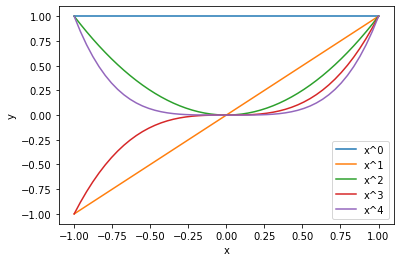

In [69]:
x = np.linspace(-1,1, num=50)

p0 = []
for i in range(len(x)):
    p0.append(x[i]**0)

p1 = []
for i in range(len(x)):
    p1.append(x[i]**1)

p2 = []
for i in range(len(x)):
    p2.append(x[i]**2)

p3 = []
for i in range(len(x)):
    p3.append(x[i]**3)

p4 = []
for i in range(len(x)):
    p4.append(x[i]**4)


plt.plot(x, p0, label='x^0')
plt.plot(x, p1, label='x^1')
plt.plot(x, p2, label='x^2')
plt.plot(x, p3, label='x^3')
plt.plot(x, p4, label='x^4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()


In [ ]:
x = np.linspace(-1,1, num=50)
p0 = []
for i in range(len(x)):
    p0.append(x[i]**0 + 0.5*x[i]**1 + 0.5*x[i]**2 - 2.0*x[i]**3 + 0.5*x[i]**4)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, p0, label='x^0 + 0.5x^1 + 0.5x^2 - 2.0x^3 + 0.5x^4')
plt.legend(loc='upper right')

plt.show()


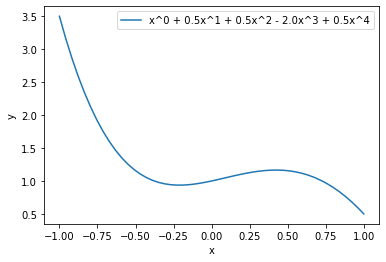

In [70]:
### Lineární regrese

#### Jednoduchá lineární regrese

### Lineární regrese

#### Jednoduchá lineární regrese

In [ ]:
"""
Dataset obsahující záznamy o pohlaví-výška-váha
Zdroj: https://www.kaggle.com/mustafaali96/weight-height
"""

wh_df = pd.read_csv('data/weight-height.csv')
wh_df.head()

In [ ]:
"""
Příklad jednoduché regresivní analýzy (pouze jeden regres)
Z tohoto důvodu budeme zkoumat pouze muže a sloupec pohlaví můžeme ignorovat.
Dále si převedeme hodnoty z datasetu na metrické jednotky, neboť jsou uvedeny v imperiálních hodnotách.
"""

# 1 palec = 2,54 cm
height_constant = 2.54

# 1 libra = 0,45359237 kg
weight_constant = 0.4535923

males_only_df = (wh_df[(wh_df.Gender == 'Male')]).drop('Gender',1) #
males_only_df.Height *= height_constant
males_only_df.Weight *= weight_constant
males_only_df.head()

In [ ]:
males_only_df.plot.scatter(x="Height", y="Weight", color='b', title='Height x Weight [Males only]', s=2);

In [ ]:
"""
Ověření lineární korelační závislosti

p - Pearsonův korelační koeficient měří sílu lineární závislosti mezi dvěma veličinami.

OTÁZKA - Jakých hodnot může p nabývat?
"""
x = males_only_df.Height
y = males_only_df.Weight
p = stats.pearsonr(x, y)
print(f"Hodnota Pearsonova korelačního koeficientu: {p[0]}.")

In [ ]:
model = LinearRegression()
model.fit(x.values.reshape((-1, 1)), y)
print(model.score())

In [ ]:
plt.scatter(x, y, color = "blue", s=2)
plt.plot(x, model.predict(x.values.reshape((-1, 1))), color = "red")
plt.title("Male weight prediction")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [ ]:
input_height = input('Zadejte vaši výšku: ')
weight_predict = model.predict(np.array(float(input_height)).reshape((-1, 1)))[0]
print(f"Predikovaná váha dle jednoduché lineární regresivní analýzy: {np.round(weight_predict, 2)}kg.")

#### Vícenásobná lineární regrese

In [ ]:
"""
Dataset obsahující záznamy o parametrech prodaných aut
Zdroj: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho
"""

#MPG = Počet ujetých mil na jeden Galon (3,785 litru) -> Vyšší je lepší
toLitres = lambda x : 235.214583 / x

column_names = ['mpg', 'horsepower', 'weight', 'acceleration','displacement']

cubic_inch_constant = 16.387064

cars_df = pd.read_csv('data/auto-mpg.csv', usecols=column_names, na_values='?')
cars_df.weight *= weight_constant
cars_df.displacement *= cubic_inch_constant
cars_df.dropna()

cars_df.horsepower =  cars_df.horsepower.astype('float')
cars_df.head()

In [ ]:
p1 = stats.pearsonr(cars_df['mpg'], cars_df['horsepower'])[0]
p2 = stats.pearsonr(cars_df['mpg'], cars_df['weight'])[0]
p3 = stats.pearsonr(cars_df['mpg'], cars_df['acceleration'])[0]
p4 = stats.pearsonr(cars_df['mpg'], cars_df['displacement'])[0]

print(f"Míra lineární závislosti spotřeba x počet koní: {p1}.")
print(f"Míra lineární závislosti spotřeba x hmotnost: {p2}.")
print(f"Míra lineární závislosti spotřeba x zrychlení: {p3}.")
print(f"Míra lineární závislosti spotřeba x zdvihový objem: {p4}.")


In [ ]:
cars_df.plot.scatter(x='horsepower', y='mpg', color='r', title='MPG x Horsepower')
cars_df.plot.scatter(x='weight', y='mpg', color='b', title='MPG x Weight')
cars_df.plot.scatter(x='acceleration', y='mpg', color='g', title='MPG x Acceleration')
cars_df.plot.scatter(x='displacement', y='mpg', color='m', title='MPG x Zdvihový objem')

In [ ]:
second_model = LinearRegression()
second_model_x = cars_df[['horsepower', 'acceleration', 'weight', 'displacement']]
second_model_y = cars_df['mpg']

# V datasetu jsou často výkonná auta u sebe, proto použijeme určitý pseudonáhodný pick
seed = random.randint(0, 1000)

second_model_x_train, second_model_x_test, \
second_model_y_train, second_model_y_test = train_test_split\
(second_model_x, second_model_y,test_size=0.25,random_state=seed)

second_model.fit(second_model_x_train, second_model_y_train)

In [ ]:
# TEST přesnosti modelu

accuracy = np.round(second_model.score(second_model_x_test, second_model_y_test), 4) * 100
print(f'Přesnost modelu: {accuracy}%')

In [ ]:
# Predikce spotřeby jiného staršího vozidla - použijeme Škodu 120
# Zdroj: http://skodaps.wz.cz/S105-136_technicke_1.php

# Nutné brát v potaz, že mnoho aut v datasetu jsou auta americká

s120_horsepower = 53.0
s120_acceleration = 20.0
s120_weight = 890.0
s120_displacement = 1147.0

s120_stats = np.array([s120_horsepower,s120_acceleration, s120_weight, s120_displacement])
result = second_model.predict(s120_stats.reshape(1, -1))[0]
print("Predikovaná spotřeba vozu Škoda 120 pomocí vícenásobné lineární regresivní analýzy: {}l/100km.".\
      format(np.round(toLitres(result), 2)))